In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
OVcbypred = 0
OVpredbytot = 0
pos_req = ["noun", "verb", "properNoun", "adjective", "adverb", "determiner", "numeral", "pronoun", "preposition"]
Catcbypred = {}
Catpredbytot = {}
for pos in pos_req:
    Catcbypred[pos] = Catpredbytot[pos] = 0
def categoryvis(lang):
    print("Language: " + lang)
    cbytot = {}
    predbytot = {}
    path = "Results/RemLang/Analysis/RAW_" + lang + ".txt"
    inp_file = open(path, "r")
    inp = inp_file.read().splitlines()
    line1 = inp[0].split()
    tot_E = int(line1[0])
    C_E = int(line1[1])
    E_E = int(line1[2])
    it = 1
    while(it < len(inp)):
        if(inp[it+1] == "-nan"):
            inp[it+1] = 0.0
        if(inp[it+2] == "-nan"):
            inp[it+2] = 0.0
        cbytot[inp[it]] = float(inp[it+1])
        predbytot[inp[it]] = float(inp[it+2])
        it+=3
    print("Total No. of Edges: " + str(tot_E))
    print("Correct Predictions: " + str(C_E) + " Extra Predictions: " + str(E_E))
    ovcbytot, ovpredbytot = 100, 100
    predE = C_E + E_E
    ovcbytot *= C_E/(C_E + E_E)
    ovpredbytot *= (C_E + E_E)/tot_E
    return ovcbytot, ovpredbytot, cbytot, predbytot

In [3]:
def plot(ovcbytot, ovpredbytot, cbytot, predbytot, lang=1):
    print("Correct by No. predictions ratio: \n" + str(cbytot))
    print("Predictions by Total ratio: \n" + str(predbytot))
    if(lang==1):
        global OVcbypred, OVpredbytot, Catcbypred, Catpredbytot
        OVcbypred += ovcbytot
        OVpredbytot += ovpredbytot
    
    n_groups = 9
    ctot = []
    predtot = []

    for pos in pos_req:
        ctot.append(min(cbytot[pos], 125)) #capped at 125 for the sake of better visualization.
        predtot.append(min(predbytot[pos], 125))
        if(lang==1):
            Catcbypred[pos] += min(cbytot[pos], 150) #dont let it skew too much
            Catpredbytot[pos] += min(predbytot[pos], 150) #dont let it skew too much
        
    plt.rcParams["figure.figsize"] = [12,6]
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35

    plt.axhline(y=ovcbytot,linewidth=2, color='r')
    plt.axhline(y=ovpredbytot,linewidth=2, color='k')

    rects1 = plt.bar(index, ctot, width=bar_width, label='Correct/Predicted')

    rects2 = plt.bar(index + bar_width, predtot, width=bar_width, label='Predicted/Total')

    plt.xlabel('Part of Speech')
    plt.ylabel('Accuracy')
    plt.title('Performance by Category')
    plt.xticks(index + bar_width, ('N', 'VB', 'PrN', 'Adj', 'Adv', 'Det', 'Num', 'Pro', 'Pre'))
    plt.legend()

    plt.tight_layout()
    plt.show()

<b> Hyperparameter Values </b><br>
Context Depth - 3 <br>
Maximum Cycle Length - 7 <br>
Source Language Repetition - Not allowed <br>
Cutoff for being 'Large Context' - 5 adjacent vertices to source <br>
Minimum Cycle Length in Large Contexts - 5 <br>
Minimum Cycle Length in Small Contexts - 4 <br>
Confidence Multiplier if Target has degree > 2 - 1.4 <br>
Confidence Threshold for predictions - 0.7 <br>
<br>
11 language pairs were taken. Each was removed and generated using the other 10. <br>
The following are analyzed: <br>
<b> Category Correct by Predicted (blue bars): </b> What percentage of the predictions made were in Apertium Data <br>
<b> Category Predicted by Total (orange bars): </b> What is the ratio of number of predictions and number of entries in Apertium data <br>
<b> Overall Correct by Predicted </b> - red horizontal line <br>
<b> Overall Predicted by Total </b> - black horizontal line <br>
*Predicted by Total is capped at 125% in visualizations to make sure that in the anomalous cases where it is very high (upto 400%) the graph visualization does not become too skewed. The exact number is mentioned in the description in such cases.*

Language: en-es
Total No. of Edges: 32036
Correct Predictions: 1728 Extra Predictions: 572
Correct by No. predictions ratio: 
{'adjective': 74.0088, 'adverb': 70.3704, 'comma': 0.0, 'coordinatingConjunction': 100.0, 'determiner': 94.7368, 'interjection': 100.0, 'modal': 0.0, 'noun': 82.4621, 'numeral': 100.0, 'preposition': 74.4898, 'presentParticipleAdjective': 0.0, 'pronoun': 33.9869, 'properNoun': 78.5714, 'punctuation': 0.0, 'reflexivePersonalPronoun': 20.0, 'relativePronoun': 32.4324, 'subordinatingConjunction': 100.0, 'verb': 84.1699}
Predictions by Total ratio: 
{'adjective': 14.3414, 'adverb': 23.7002, 'comma': 0.0, 'coordinatingConjunction': 42.8571, 'determiner': 18.0952, 'interjection': 1.26582, 'modal': 0.0, 'noun': 3.55996, 'numeral': 6.0, 'preposition': 52.6882, 'presentParticipleAdjective': 0.0, 'pronoun': 37.6847, 'properNoun': 0.35035, 'punctuation': 0.0, 'reflexivePersonalPronoun': 13.5135, 'relativePronoun': 43.5294, 'subordinatingConjunction': 66.6667, 'verb': 7.065

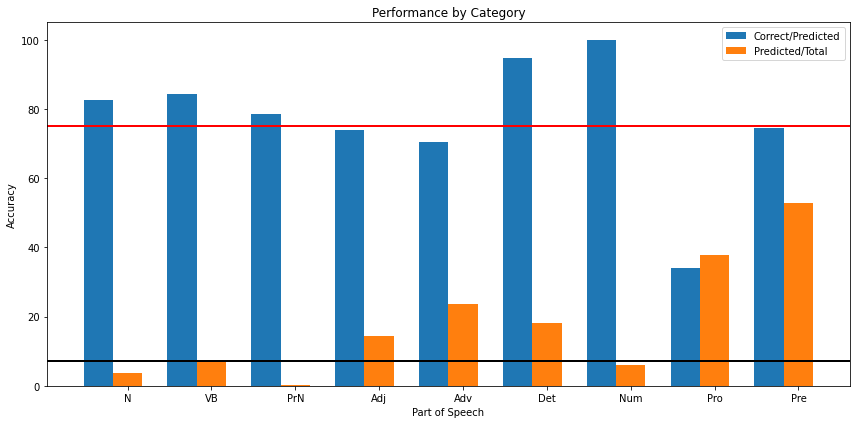

In [4]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("en-es")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair in Apertium is medium sized with 32k edges. The algorithm makes a small ratio of predictions (6-7%) but a good ratio is in the Apertium data. Only the performance on pronouns is significantly bad, and this is as expected (pronouns are governed by lexical selection rules mostly). Notable is the 100% accuracy on numerals, and high acuracy on Determiners, Nouns, Verbs etc. Only a very small fraction of propernouns have been predicted though. 

Language: en-ca
Total No. of Edges: 13159
Correct Predictions: 1655 Extra Predictions: 4622
Correct by No. predictions ratio: 
{'adjective': 42.0588, 'adverb': 73.7844, 'comma': 0.0, 'coordinatingConjunction': 80.0, 'determiner': 76.0, 'interjection': 100.0, 'modal': 0.0, 'noun': 1.47541, 'numeral': 100.0, 'preposition': 67.8161, 'presentParticipleAdjective': 0.0, 'pronoun': 50.5618, 'properNoun': 2.6178, 'punctuation': 0.0, 'reflexivePersonalPronoun': 0.0, 'relativePronoun': 23.8095, 'subordinatingConjunction': 100.0, 'verb': 93.484}
Predictions by Total ratio: 
{'adjective': 29.3441, 'adverb': 11.5338, 'comma': 0.0, 'coordinatingConjunction': 33.3333, 'determiner': 38.4615, 'interjection': 4.54545, 'modal': 0.0, 'noun': 483.487, 'numeral': 12.2449, 'preposition': 52.4096, 'presentParticipleAdjective': 0.0, 'pronoun': 37.395, 'properNoun': 35.3704, 'punctuation': 0.0, 'reflexivePersonalPronoun': 22.2222, 'relativePronoun': 123.529, 'subordinatingConjunction': 50.0, 'verb': 19.6653}


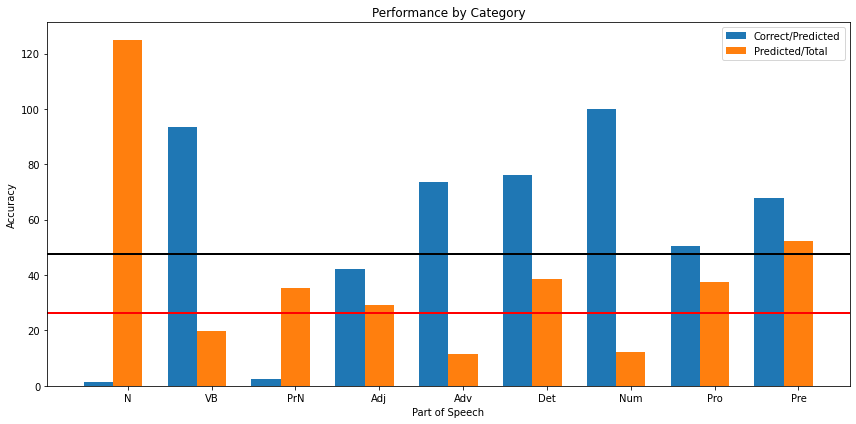

In [5]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("en-ca")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair is very small sized with only 13k edges. The algorithm thus probably makes a large ratio of predictions (almost 50% size). However, clearly only ~25% is already in the apertium data. This is quite bad, presumably also due to the small size of the pre-existing data. Surprisingly, the C/P ratio is very bad for nouns and proper nouns too. This is quite anomalous. 100% accuracy on numerals is achieved again. Note the very high (4.83) P/T ratio for nouns. This seems to be in conclusion, a very problematic pair.

Language: fr-es
Total No. of Edges: 22330
Correct Predictions: 6513 Extra Predictions: 3558
Correct by No. predictions ratio: 
{'adjective': 71.0287, 'adverb': 62.2862, 'coordinatingConjunction': 85.7143, 'determiner': 72.7273, 'interjection': 66.6667, 'modal': 0.0, 'noun': 67.0893, 'numeral': 91.6667, 'preposition': 47.482, 'pronoun': 30.2083, 'properNoun': 52.1694, 'reflexivePersonalPronoun': 41.6667, 'relativePronoun': 23.913, 'subordinatingConjunction': 100.0, 'verb': 77.8146}
Predictions by Total ratio: 
{'adjective': 58.8066, 'adverb': 64.1085, 'coordinatingConjunction': 116.667, 'determiner': 70.9677, 'interjection': 21.4286, 'modal': 0.0, 'noun': 59.029, 'numeral': 26.6667, 'preposition': 85.2761, 'pronoun': 211.765, 'properNoun': 24.8882, 'reflexivePersonalPronoun': 150.0, 'relativePronoun': 117.949, 'subordinatingConjunction': 100.0, 'verb': 35.6693}


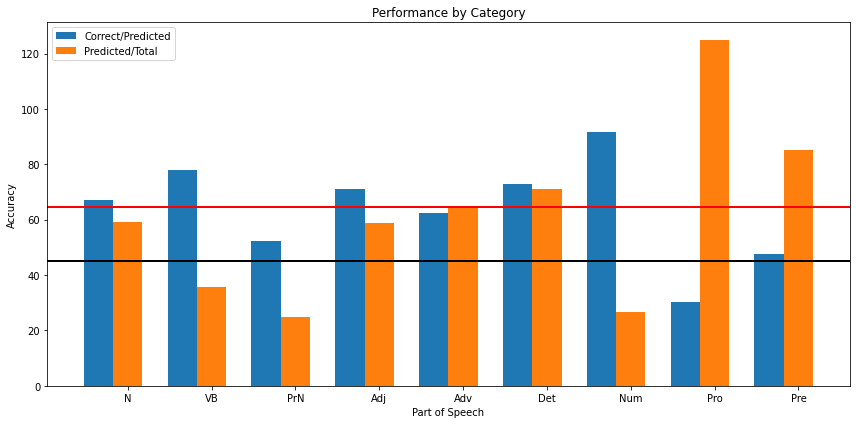

In [6]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("fr-es")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair is small sized with 22k edges. The algorithm makes a fairly high ratio of predictions (~45%) out of which almost 65% is in the Apertium pair. Not only pronouns, even the performance on Propernouns (which shouldn't have polysemy?) and prepositions is bad too. There is a 2.1 (very high) P/T ratio for pronouns and fairly high on prepositions too. This pair kind of slots in the middle of the first 2 pairs, both in size and outcomes.

Language: fr-ca
Total No. of Edges: 126730
Correct Predictions: 5525 Extra Predictions: 867
Correct by No. predictions ratio: 
{'adjective': 90.8421, 'adverb': 67.5702, 'coordinatingConjunction': 100.0, 'determiner': 64.6154, 'interjection': 100.0, 'modal': 0.0, 'noun': 88.9176, 'numeral': 46.1538, 'preposition': 62.766, 'pronoun': 38.3784, 'properNoun': 96.0826, 'reflexivePersonalPronoun': 100.0, 'relativePronoun': 13.3333, 'subordinatingConjunction': 100.0, 'verb': 88.4466}
Predictions by Total ratio: 
{'adjective': 10.4706, 'adverb': 24.8796, 'coordinatingConjunction': 100.0, 'determiner': 116.071, 'interjection': 6.66667, 'modal': 0.0, 'noun': 4.7726, 'numeral': 54.9296, 'preposition': 38.843, 'pronoun': 71.4286, 'properNoun': 1.4197, 'reflexivePersonalPronoun': 26.3158, 'relativePronoun': 88.2353, 'subordinatingConjunction': 100.0, 'verb': 21.4539}


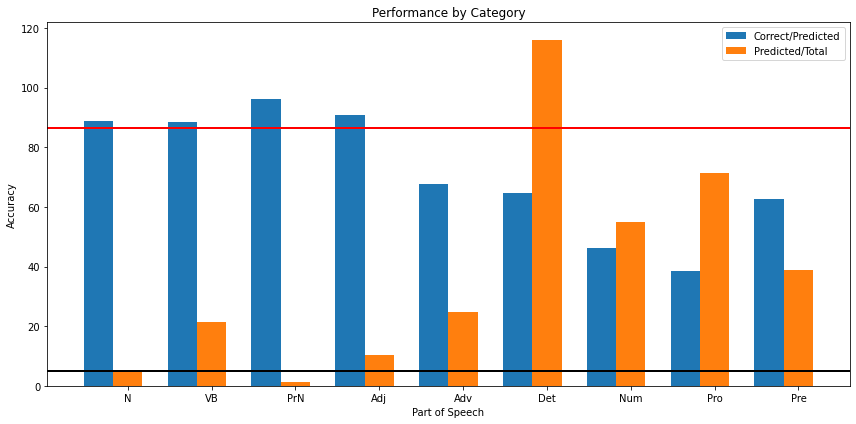

In [7]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("fr-ca")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair is very large in Apertium with 126k edges. The algorithm makes less than 5% predictions of that number. The accuracy (no. of predictions in apertium data) is fairly high though (87-88%). The accuracy for propernouns particularly is very high (96%) because these are less likely to have polysemy. The number of predictions is quite small for propernouns though. Adverbs, Determiners and surprisingly numerals also have low accuray though. The ratio of new determiners produced (compared to apertium data) is however quite high (which may explain why many weren't identified as 'correct'. The results are quite decent in-all, close to expectations.

Language: eo-fr
Total No. of Edges: 36518
Correct Predictions: 5461 Extra Predictions: 5271
Correct by No. predictions ratio: 
{'adjective': 86.761, 'adverb': 80.9278, 'comma': 0.0, 'coordinatingConjunction': 100.0, 'determiner': 76.9231, 'interjection': 100.0, 'noun': 66.3372, 'numeral': 100.0, 'preposition': 76.3158, 'pronoun': 69.8795, 'properNoun': 11.0318, 'reflexivePersonalPronoun': 0.0, 'relativePronoun': 59.2593, 'subordinatingConjunction': 100.0, 'verb': 27.9091}
Predictions by Total ratio: 
{'adjective': 18.1749, 'adverb': 14.9547, 'comma': 0.0, 'coordinatingConjunction': 80.0, 'determiner': 65.0, 'interjection': 3.0303, 'noun': 23.43, 'numeral': 5.91133, 'preposition': 27.0463, 'pronoun': 41.7085, 'properNoun': 96.0233, 'reflexivePersonalPronoun': 320.0, 'relativePronoun': 55.102, 'subordinatingConjunction': 100.0, 'verb': 51.9849}


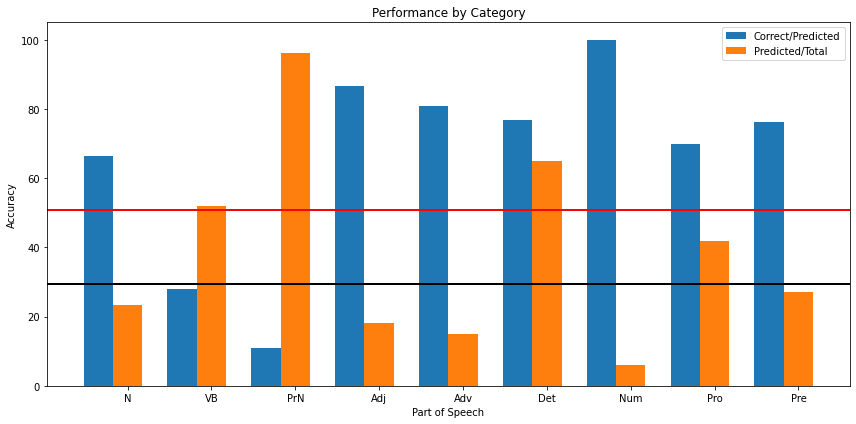

In [8]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("eo-fr")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair is medium sized with 36k edges. The percentage of surely correct, or entries in the apertium data are small (just above 50%). This might partly be explained by a relatively high ratio of additional entries generated (almost 30%). Surprisingly the ratio of correct on proper nouns is quite low (12-13%). Even in verbs it is 27-28%. The other categories do fairly well in this aspect though. The ratio of predicted pronouns to total number in Apertium data is almost 1, which is quite high. Even for verbs and determiners it is high. It is quite low for numerals, adverbs, and adjectives though. For the size, the performance does not seem too great.

Language: eo-ca
Total No. of Edges: 51032
Correct Predictions: 4166 Extra Predictions: 2215
Correct by No. predictions ratio: 
{'adjective': 65.1646, 'adverb': 57.6481, 'comma': 0.0, 'coordinatingConjunction': 50.0, 'determiner': 69.4444, 'interjection': 33.3333, 'noun': 67.2476, 'numeral': 100.0, 'preposition': 52.3256, 'pronoun': 27.4809, 'properNoun': 85.514, 'punctuation': 0.0, 'reflexivePersonalPronoun': 0.0, 'relativePronoun': 15.3846, 'subordinatingConjunction': 100.0, 'verb': 61.9672}
Predictions by Total ratio: 
{'adjective': 41.1555, 'adverb': 26.0359, 'comma': 0.0, 'coordinatingConjunction': 85.7143, 'determiner': 67.9245, 'interjection': 300.0, 'noun': 20.1124, 'numeral': 40.0, 'preposition': 73.5043, 'pronoun': 148.864, 'properNoun': 0.84776, 'punctuation': 0.0, 'reflexivePersonalPronoun': 150.0, 'relativePronoun': 144.444, 'subordinatingConjunction': 100.0, 'verb': 18.4179}


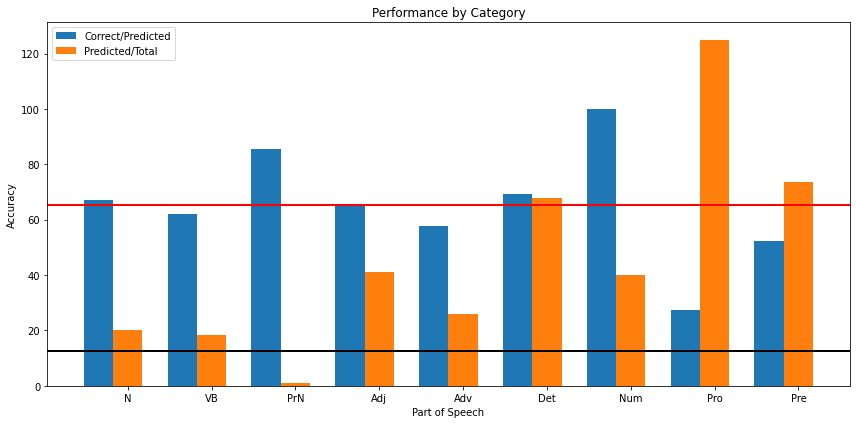

In [9]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("eo-ca")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair is large sized with 51k edges. Despite this the percentage of surely correct, or entries in the apertium data are not great (62-63%). The percentage of predictions to actual total number isn't very high. The accuracy for propernouns and numerals is high as should be. However the ratio of predictions for propernouns is quite small. Pronouns as usual behave weirdly with very high P/T ratio (1.48). Prepositions and determiners are quite high too in this aspect. For it's size, the performance is not great.

Language: eo-es
Total No. of Edges: 75255
Correct Predictions: 5537 Extra Predictions: 2578
Correct by No. predictions ratio: 
{'adjective': 78.1413, 'adverb': 75.3456, 'comma': 0.0, 'coordinatingConjunction': 100.0, 'determiner': 68.9655, 'interjection': 100.0, 'noun': 74.2731, 'numeral': 25.0, 'preposition': 75.0, 'pronoun': 48.8, 'properNoun': 89.9628, 'punctuation': 0.0, 'reflexivePersonalPronoun': 4.16667, 'relativePronoun': 26.3158, 'subordinatingConjunction': 100.0, 'verb': 23.9854}
Predictions by Total ratio: 
{'adjective': 27.1333, 'adverb': 14.0362, 'comma': 0.0, 'coordinatingConjunction': 41.6667, 'determiner': 69.0476, 'interjection': 8.82353, 'noun': 13.7003, 'numeral': 66.6667, 'preposition': 34.188, 'pronoun': 79.1139, 'properNoun': 0.860649, 'punctuation': 0.0, 'reflexivePersonalPronoun': 141.176, 'relativePronoun': 108.571, 'subordinatingConjunction': 33.3333, 'verb': 128.697}


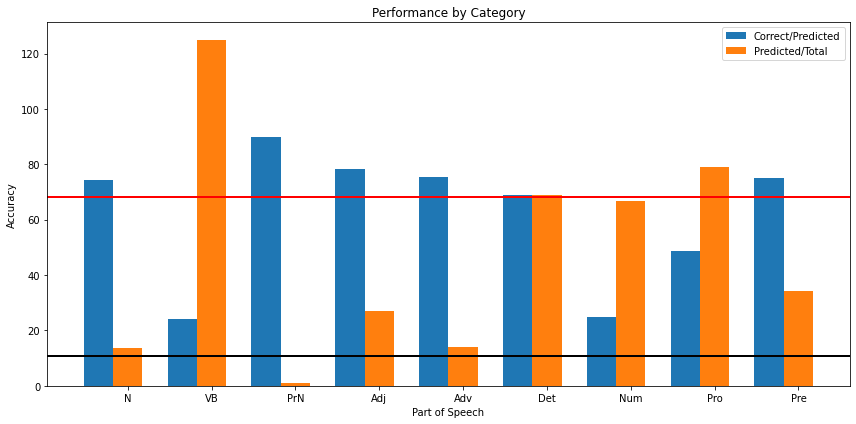

In [10]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("eo-es")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair is quite large sized with 76k edges. Despite this the percentage of surely correct, or entries in the apertium data are not great (68%). The percentage of predictions to actual total number is small (12-13%). The accuracy for propernouns is high (90+%) as should be. The numerals behavior is unlike ones seen till now because only 34 numeral entries are there in Apertium data. Verbs behave weirdly with very high P/T ratio (1.28). Pronouns and determiners are quite high too in this aspect. For it's size, the performance is not encouraging.

Language: eo-en
Total No. of Edges: 32062
Correct Predictions: 1624 Extra Predictions: 3350
Correct by No. predictions ratio: 
{'adjective': 64.6383, 'adverb': 62.781, 'comma': 0.0, 'coordinatingConjunction': 71.4286, 'determiner': 55.5556, 'interjection': 50.0, 'noun': 21.2557, 'numeral': 60.0, 'preposition': 71.0843, 'pronoun': 41.5094, 'properNoun': 2.25649, 'punctuation': 0.0, 'reflexivePersonalPronoun': 0.0, 'relativePronoun': 47.0588, 'subordinatingConjunction': 100.0, 'verb': 60.4651}
Predictions by Total ratio: 
{'adjective': 11.8018, 'adverb': 27.508, 'comma': 0.0, 'coordinatingConjunction': 70.0, 'determiner': 64.2857, 'interjection': 9.09091, 'noun': 10.0196, 'numeral': 2.94118, 'preposition': 78.3019, 'pronoun': 71.1409, 'properNoun': 347.128, 'punctuation': 0.0, 'reflexivePersonalPronoun': 75.0, 'relativePronoun': 125.926, 'subordinatingConjunction': 100.0, 'verb': 6.98916}


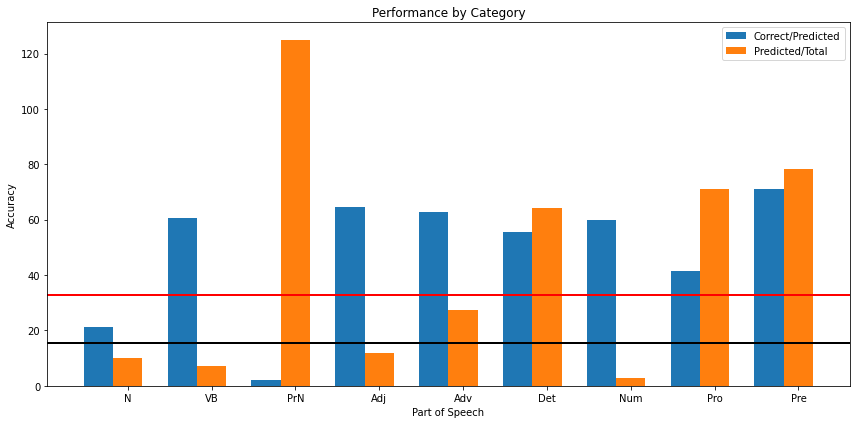

In [11]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("eo-en")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair is medium sized with 32k edges. The percentage of surely correct, or entries in the apertium data are very small (~35%). Despite this the P/T ratio is under 20%. Surprisingly the ratio of correct on proper nouns is quite low (<5%). Even in nouns it is just over 20%. The other categories perform better though. The P/T ratio for proper nouns is surprisingly high, 3.48. This might be because of the relatively lower (705) number of propernouns in eo-en. Even for pronouns and prepositions it is high. For the size, the performance is quite poor. This seems a problematic language-pair.

Language: oc-ca
Total No. of Edges: 15876
Correct Predictions: 5052 Extra Predictions: 6011
Correct by No. predictions ratio: 
{'adjective': 78.9614, 'adverb': 70.7768, 'coordinatingConjunction': 87.5, 'determiner': 73.5294, 'interjection': 0.0, 'modal': 0.0, 'noun': 43.7347, 'numeral': 46.1538, 'personalPronoun': 0.0, 'preposition': 53.7931, 'pronoun': 62.6866, 'properNoun': 27.5516, 'reflexivePersonalPronoun': 66.6667, 'relativePronoun': 0.0, 'verb': 63.8508}
Predictions by Total ratio: 
{'adjective': 33.7376, 'adverb': 35.3994, 'coordinatingConjunction': 47.0588, 'determiner': 51.1278, 'interjection': 0.0, 'modal': 0.0, 'noun': 88.5652, 'numeral': 7.18232, 'personalPronoun': 0.0, 'preposition': 69.7115, 'pronoun': 28.3898, 'properNoun': 85.4882, 'reflexivePersonalPronoun': 150.0, 'relativePronoun': 9.09091, 'verb': 57.3298}


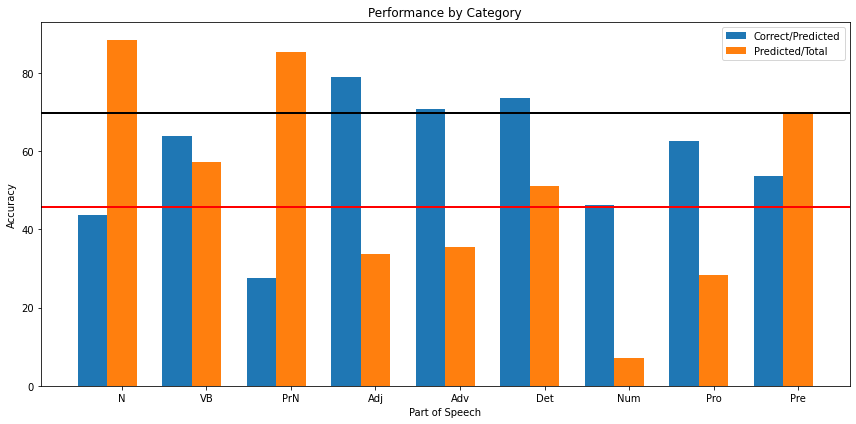

In [12]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("oc-ca")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair is very small sized with only 15k edges. The algorithm thus probably makes a surprisingly large ratio of predictions (almost 70%+ of Apertium size). However, clearly only ~45% is already in the apertium data. Surprisingly, the C/P ratio is low for nouns and proper nouns too. This is anomalous. The P/T ratio is quite high for Nouns, properNouns and prepositions. For it's size, the performance seems ok (not much can be said).

Language: oc-es
Total No. of Edges: 16352
Correct Predictions: 4191 Extra Predictions: 721
Correct by No. predictions ratio: 
{'adjective': 89.3491, 'adverb': 78.318, 'coordinatingConjunction': 72.7273, 'determiner': 84.0, 'interjection': 0.0, 'modal': 0.0, 'noun': 87.7459, 'numeral': 100.0, 'preposition': 77.0492, 'pronoun': 64.5161, 'properNoun': 76.972, 'reflexivePersonalPronoun': 100.0, 'relativePronoun': 8.0, 'subordinatingConjunction': 0.0, 'verb': 85.0435}
Predictions by Total ratio: 
{'adjective': 32.0379, 'adverb': 35.346, 'coordinatingConjunction': 68.75, 'determiner': 50.0, 'interjection': 0.0, 'modal': 0.0, 'noun': 38.4565, 'numeral': 0.44843, 'preposition': 61.3065, 'pronoun': 39.0756, 'properNoun': 11.9489, 'reflexivePersonalPronoun': 100.0, 'relativePronoun': 80.6452, 'subordinatingConjunction': 0.0, 'verb': 25.3304}


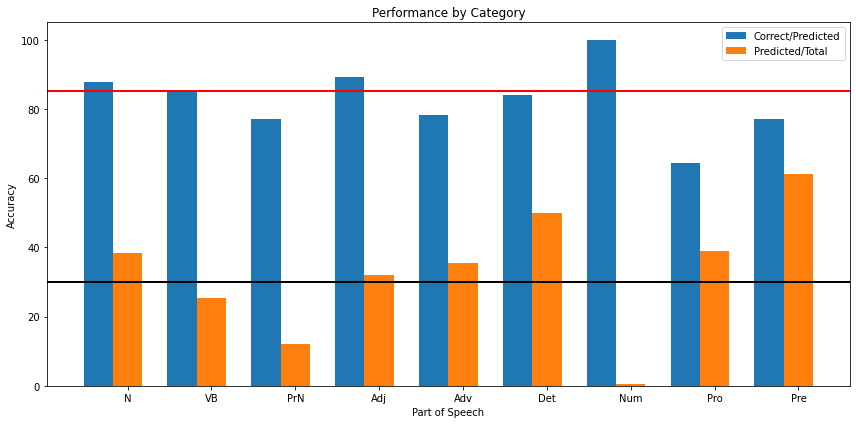

In [13]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("oc-es")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair is small sized with 16k edges. Despite this the percentage of surely correct, or entries in the apertium data is quite high! (~85%). The P/T ratio is good too (30+%). Performance is close to expectations (and quite good) across categories. This performance on this language pair is surprisingly good, considering its size.

Language: oc-fr
Total No. of Edges: 82087
Correct Predictions: 4782 Extra Predictions: 2640
Correct by No. predictions ratio: 
{'adjective': 53.3068, 'adverb': 45.2595, 'comma': 0.0, 'coordinatingConjunction': 63.6364, 'determiner': 43.1818, 'interjection': 0.0, 'modal': 0.0, 'noun': 69.8146, 'numeral': 85.7143, 'preposition': 62.5, 'pronoun': 40.8046, 'properNoun': 77.3946, 'reflexivePersonalPronoun': 25.0, 'relativePronoun': 58.3333, 'subordinatingConjunction': 100.0, 'verb': 72.1106}
Predictions by Total ratio: 
{'adjective': 28.8042, 'adverb': 62.204, 'comma': 0.0, 'coordinatingConjunction': 137.5, 'determiner': 141.935, 'interjection': 33.3333, 'modal': 100.0, 'noun': 10.0297, 'numeral': 3.25581, 'preposition': 42.8169, 'pronoun': 98.3051, 'properNoun': 0.816314, 'reflexivePersonalPronoun': 400.0, 'relativePronoun': 23.0769, 'subordinatingConjunction': 100.0, 'verb': 24.3798}


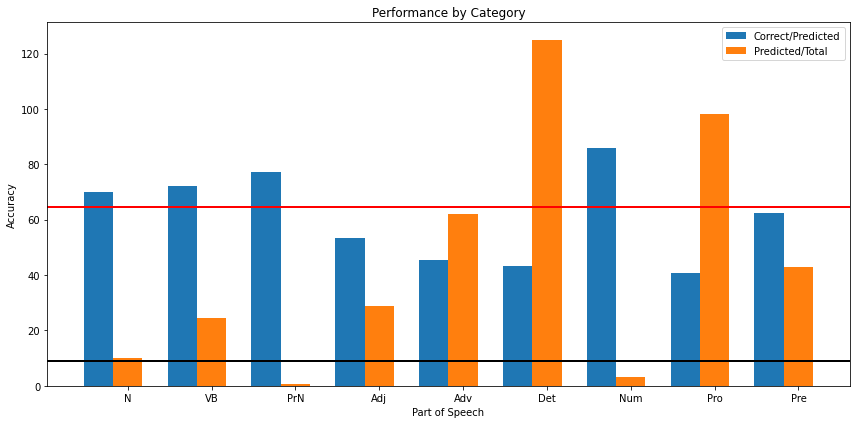

In [14]:
ovcbytot, ovpredbytot, cbytot, predbytot = categoryvis("oc-fr")
plot(ovcbytot, ovpredbytot, cbytot, predbytot)

<b> Observations </b> <br>
The pair is quite large in Apertium with 82k edges. The algorithm makes less than 10% predictions of that number. The accuracy (no. of predictions in apertium data) is still quite low though (~65%). The number of predictions is quite small for propernouns, numerals and nouns. Adverbs, Adjectives, Determiners and surprisingly numerals also have low accuracy though. The ratio of new determiners produced (compared to apertium data) is however quite high (1.41) which may explain why many weren't identified as 'correct'. The results are not good considering the size of the pair.

Now, the final visualization will be an aggregate of the 11 language pairs.

Correct by No. predictions ratio: 
{'noun': 60.94120090909092, 'verb': 67.20425454545455, 'properNoun': 54.55677181818181, 'adjective': 72.20553636363637, 'adverb': 67.73345454545455, 'determiner': 70.87993636363636, 'numeral': 77.69896363636364, 'pronoun': 46.25568181818182, 'preposition': 65.51108181818182}
Predictions by Total ratio: 
{'noun': 38.33411454545455, 'verb': 36.089394545454546, 'properNoun': 37.09216118181818, 'adjective': 27.80071818181818, 'adverb': 30.88239090909091, 'determiner': 68.44690909090909, 'numeral': 20.567906363636368, 'pronoun': 73.00964545454546, 'preposition': 56.00839090909091}


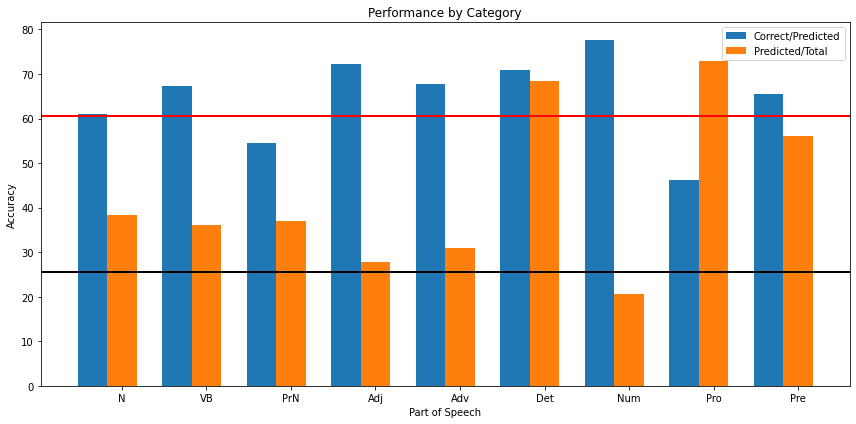

In [15]:
for pos in pos_req:
    Catcbypred[pos]/=11
    Catpredbytot[pos]/=11
OVcbypred/=11
OVpredbytot/=11
plot(OVcbypred, OVpredbytot, Catcbypred, Catpredbytot, 0)

<b>Understanding the graph</b><br><br>
*Disclaimer: All data has been averaged across the 11 language pairs, i.e. equal weightage has been given to each language pair. It is not weighted by number of entries in the language pair.* <br>
The Red Horizontal Line shows the overall correct (in apertium data) /new predictions ratio. For categories it is shown by the blue bars as before<br>
The Black Horizontal Line shows the overall new predictions/total no. of entries ratio. For categories it is shown by the orange bars as before <br>

<b>Overall analysis of categories</b> <br>
A high C/P can signify 2 things: Either the algorithm is doing well or the apertium data is quite exhaustive, or both. <br>
A high P/T signifies: The algorithm is generating a high number of predictions when compare the to the apertium data size for the same category. Based on the C/P ratio, many of these entries may not already be in apertium data, in which case their correctness is unknown. <br>
Nouns seem to be representative of the overall data in many language-pairs. They are close to the overall data metrics both in C/P. Though as it can be seen, in P/T they are often higher. <br> 
The C/P on verbs is quite high, which is good considering the P/T is good too. <br>
Proper nouns really should have higher accuracy as here, since there shouldn't be polysemy in them. Worth investigating why its only 57%. The P/T is fairly high too. <br>
Adjectives too have high C/P and P/T is near the average. Same with adverbs. <br>
Determiners on the other hand not only have high C/P, they also have quite high P/T, which shows the algorithm is doing surprisingly well on them (high number of predictions, mostly verifiably correct). <br>
Numerals have the highest C/P consistently, but low P/T. <br>
Pronouns have performaed badly throughout, with lowest C/P and highest P/T. It is probable that in the extra unverifiable predictions many are wrong, since pronouns are mostly dealt through grammar rules. <br>
Prepositions have good performance, only slightly lower than Determiners. <br>